# Gradient Boosting Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

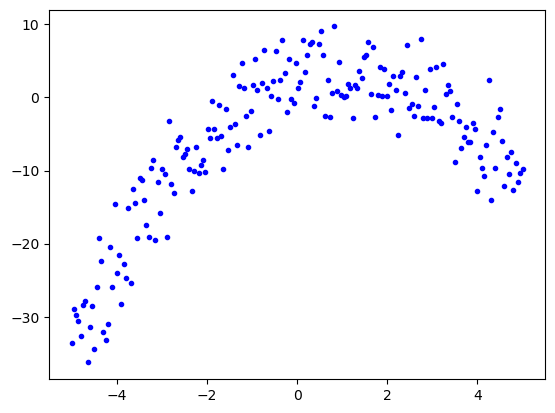

In [2]:
N = 200
x = np.linspace(-5, 5, N)
y = -x**2 + 2 * x + 3 + 4 * np.random.randn(N)

plt.plot(x, y, 'b.')

In [11]:
def plot_predictions_and_residuals(x, y, Fm, title=''):
    fig = plt.figure(figsize=(16,3))
    fig.suptitle(title)
    
    plt.subplot(1,2,1)
    plt.plot(x, y, 'b.')
    plt.plot(x, Fm, 'r-')
    plt.grid()
    plt.title('Predictions')
    
    plt.subplot(1,2,2)
    r = y-Fm
    plt.plot(x, r, 'g.')
    plt.grid()
    plt.ylim([y.min(), y.max()])
    plt.title('Residuals')

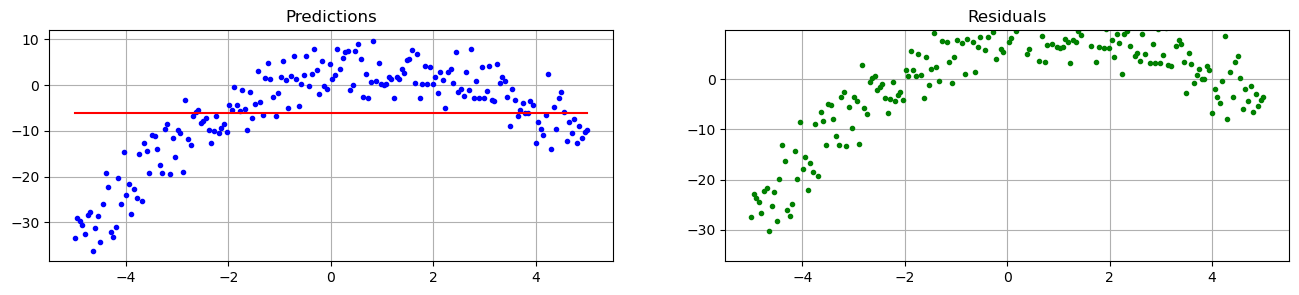

In [4]:
F0 = y.mean()
Fm = np.full(N, F0)

plot_predictions_and_residuals(x, y, Fm)

In [5]:
learning_rate = .3

trees = []

In [6]:
x = x.reshape(N, 1)

Here is first tree
    m = 1

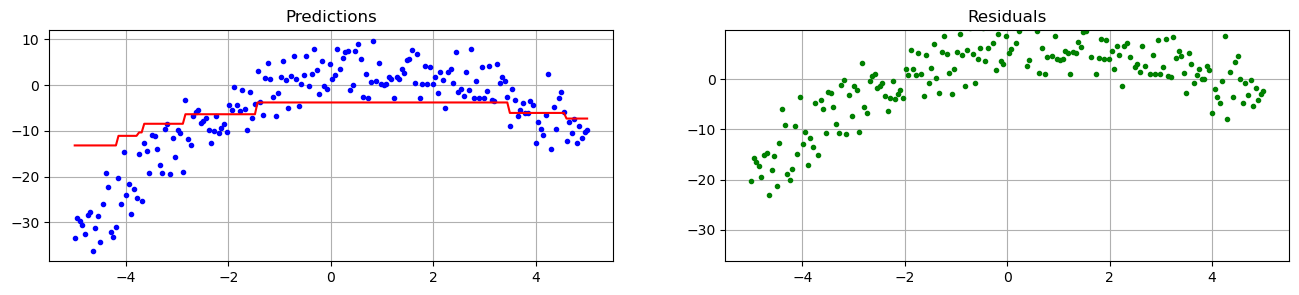

In [7]:
#calculate rim (yi - Fm) residuals

rm = y - Fm

tree = DecisionTreeRegressor(max_depth=3).fit(x, rm)

Fm += learning_rate * tree.predict(x)

plot_predictions_and_residuals(x, y, Fm)

Second tree m = 2

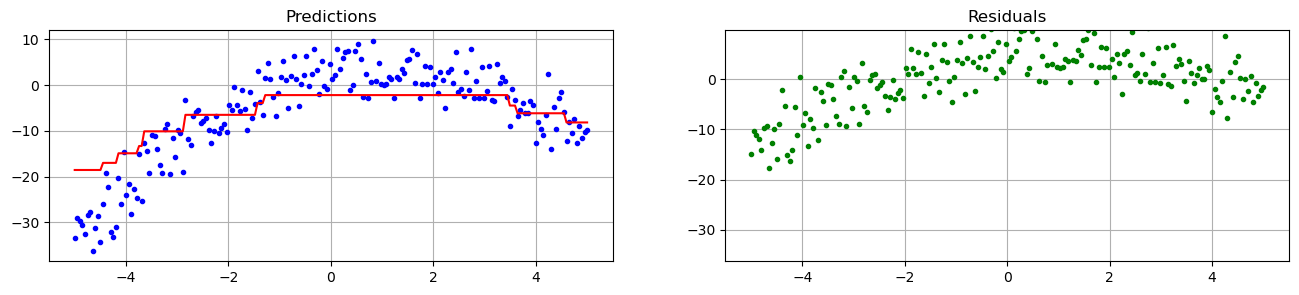

In [8]:
#calculate rim (yi - Fm) residuals

rm = y - Fm

tree = DecisionTreeRegressor(max_depth=3).fit(x, rm)

Fm += learning_rate * tree.predict(x)

plot_predictions_and_residuals(x, y, Fm)

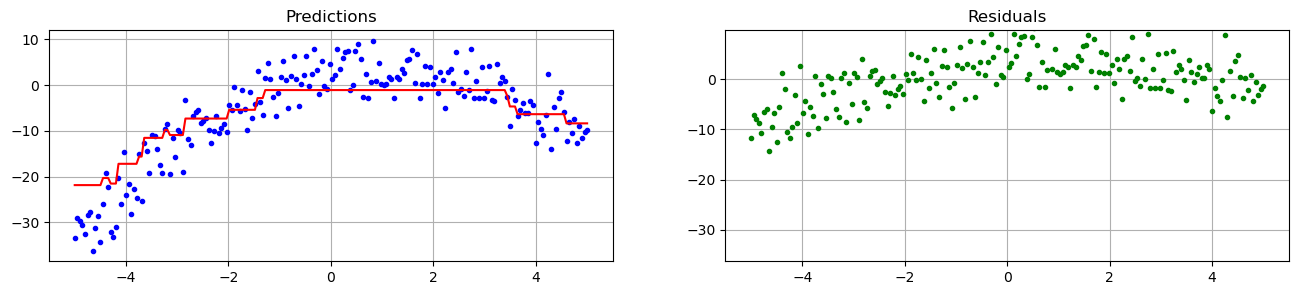

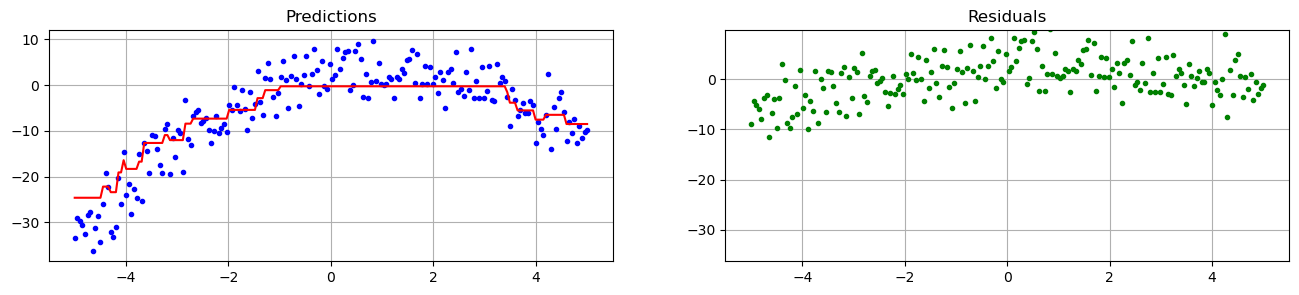

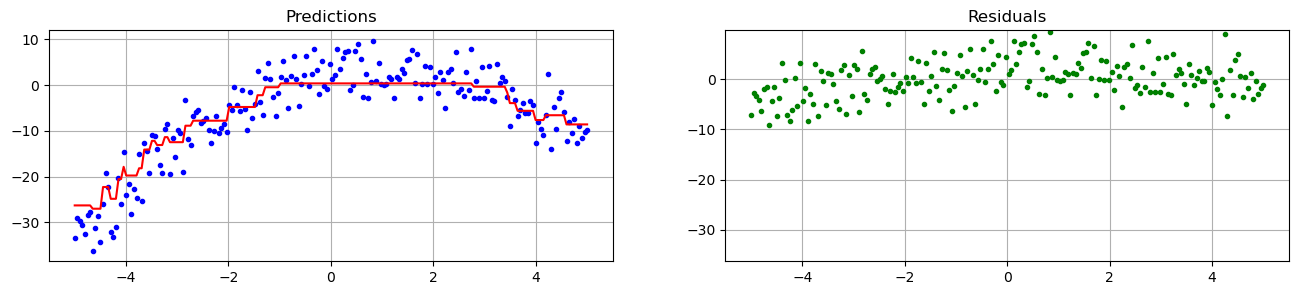

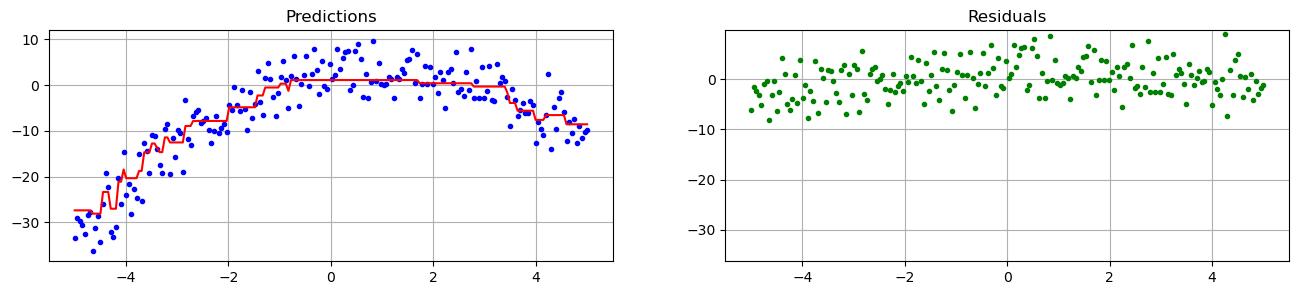

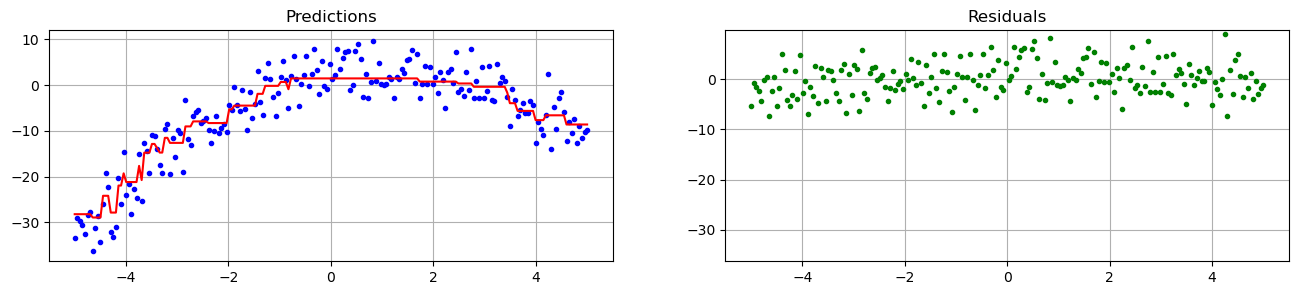

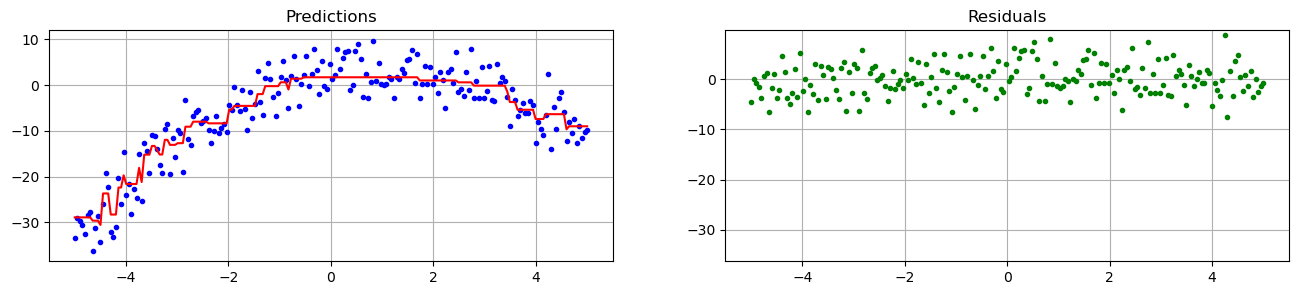

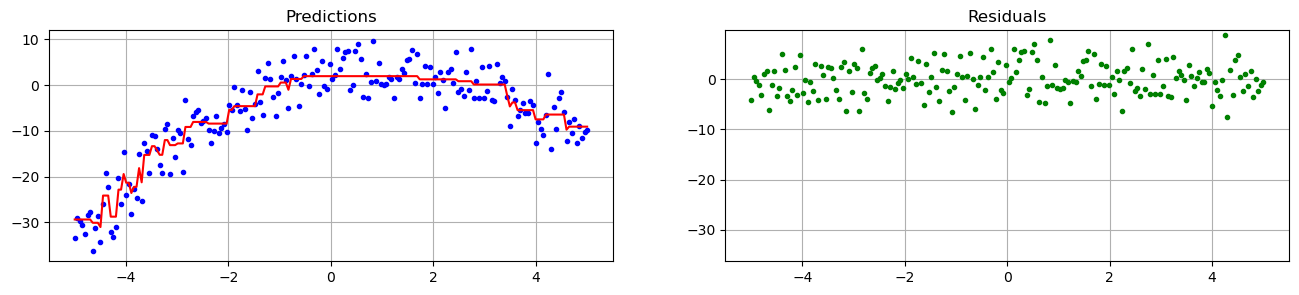

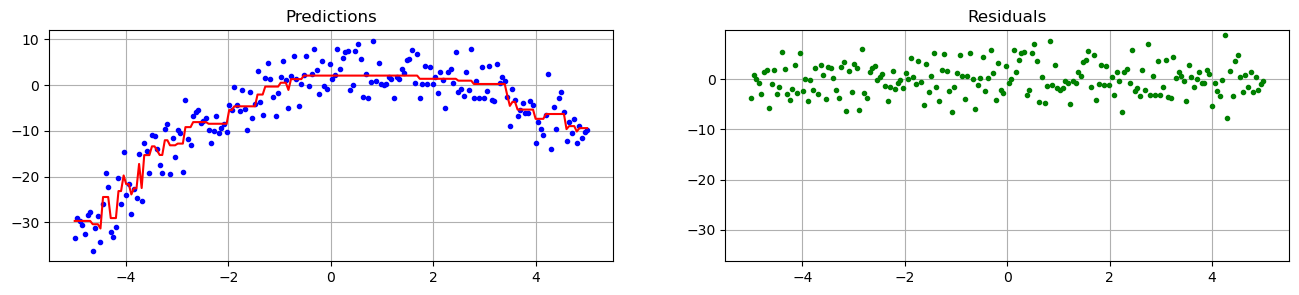

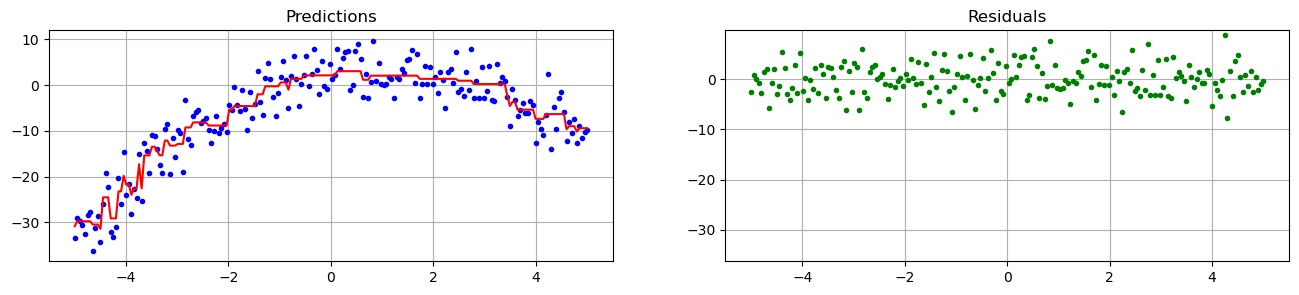

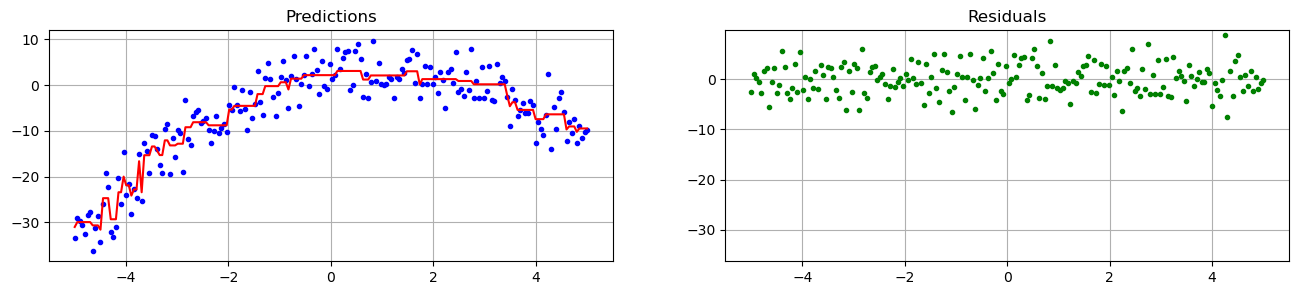

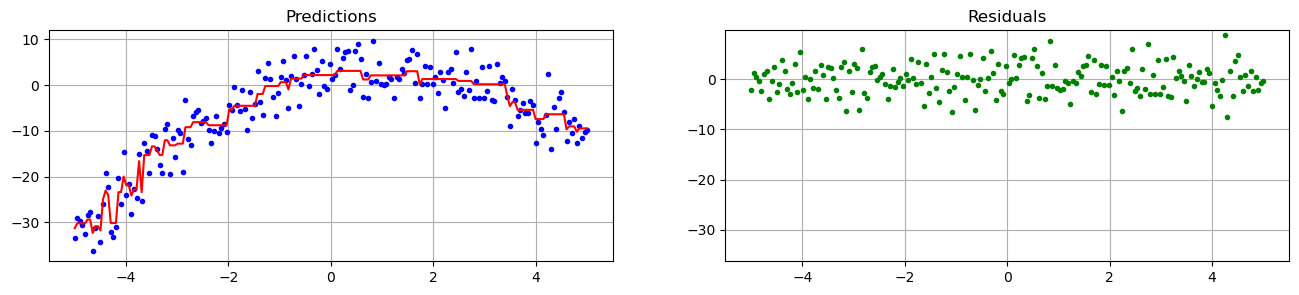

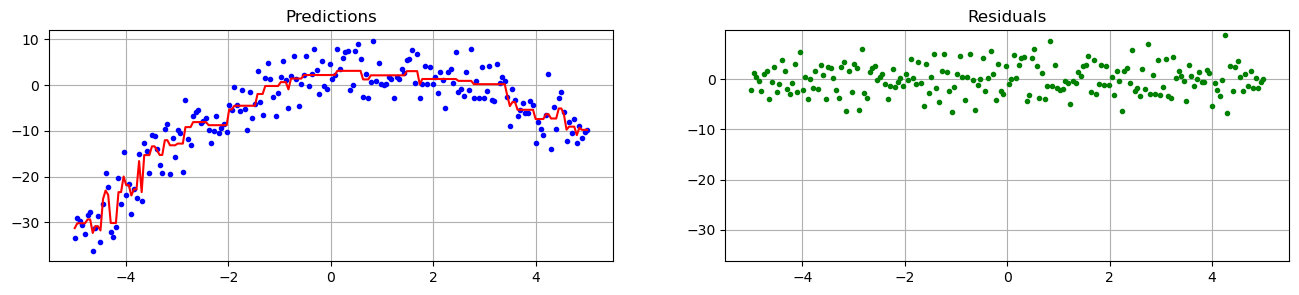

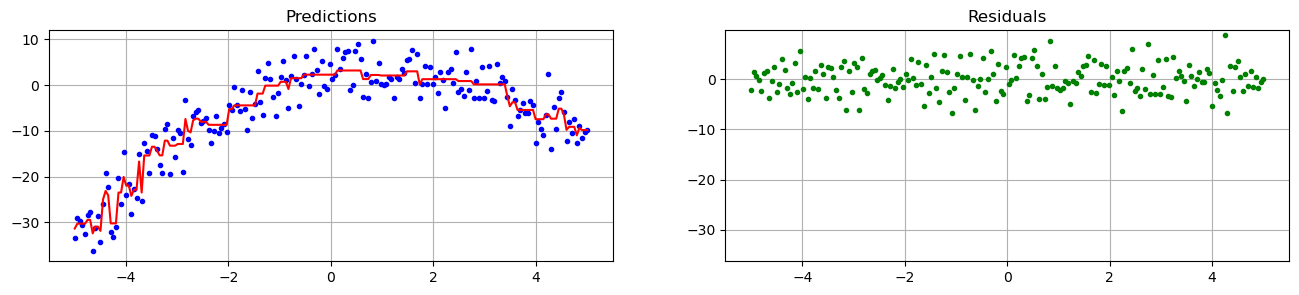

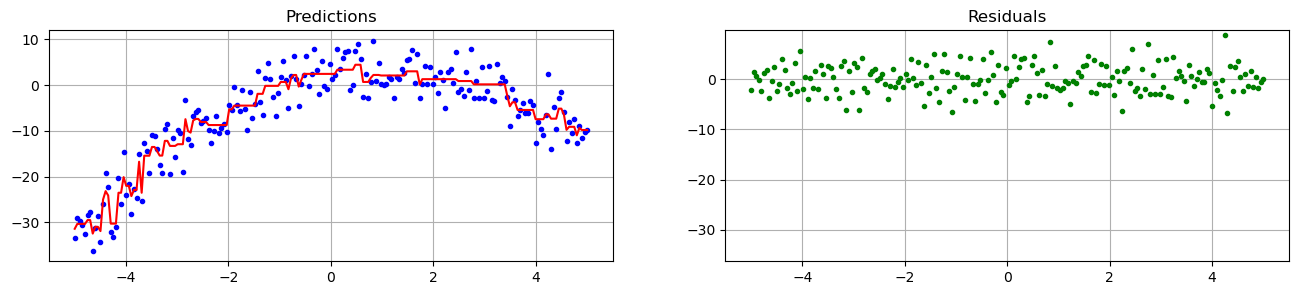

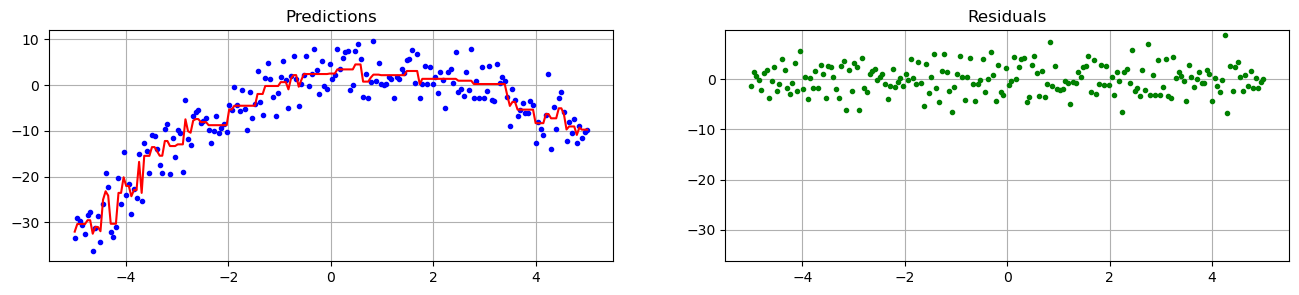

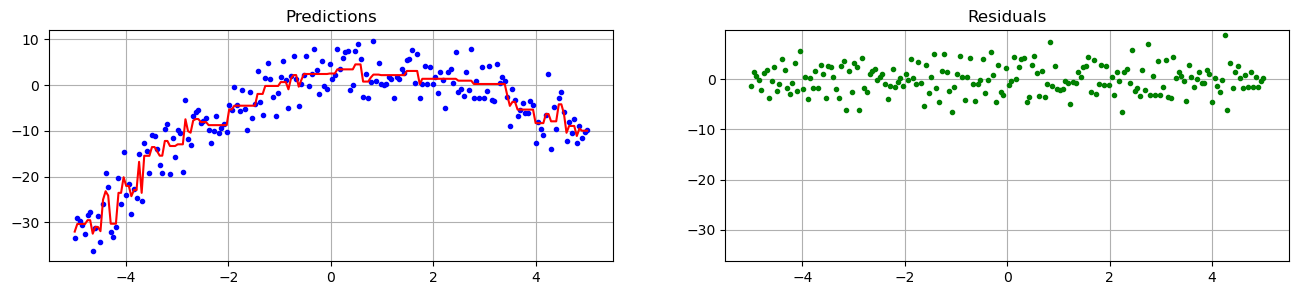

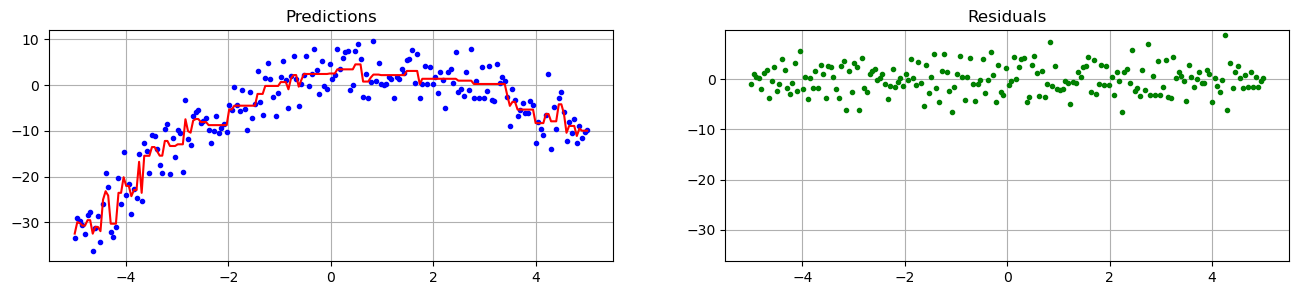

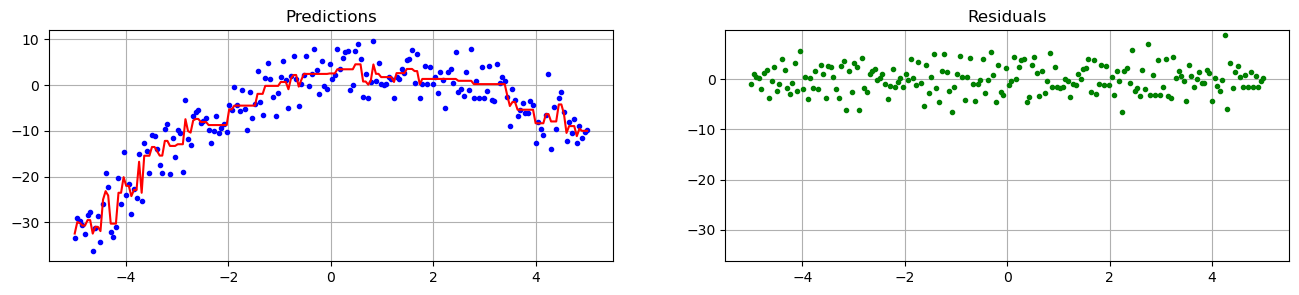

In [9]:
for _ in range(18):
    rm = y - Fm

    tree = DecisionTreeRegressor(max_depth=3).fit(x, rm)

    Fm += learning_rate * tree.predict(x)
    plot_predictions_and_residuals(x, y, Fm)

## Impact of learning rate

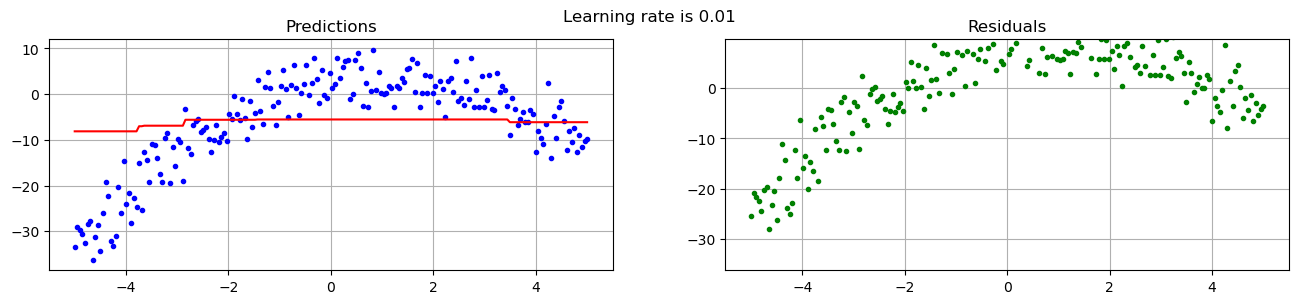

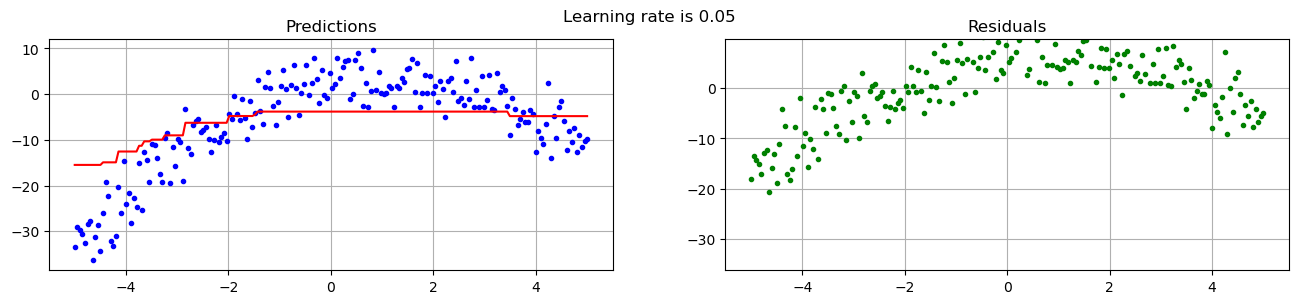

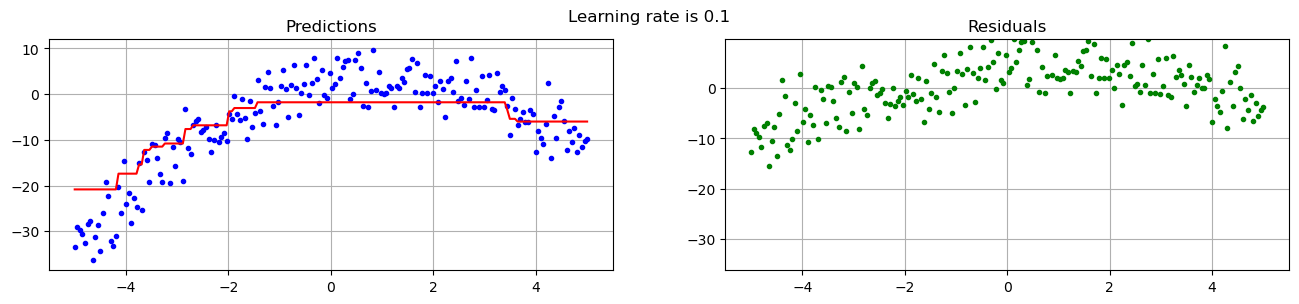

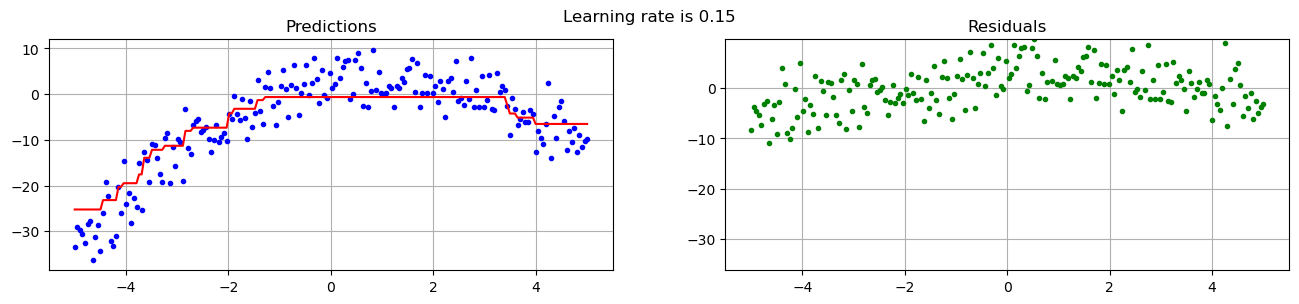

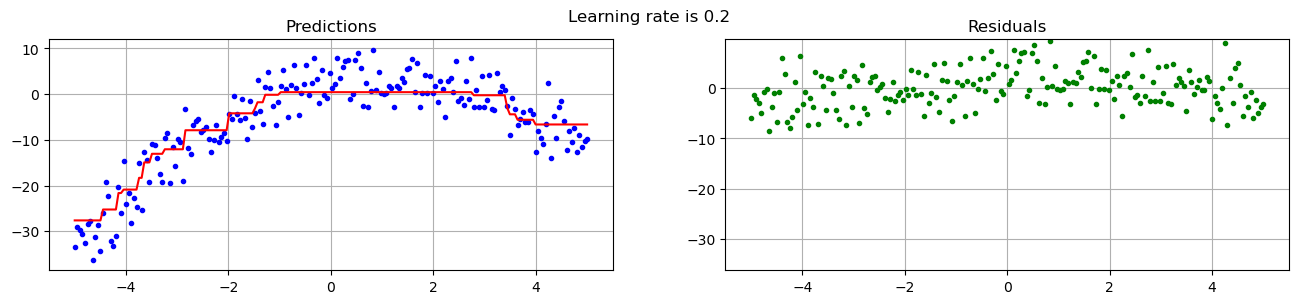

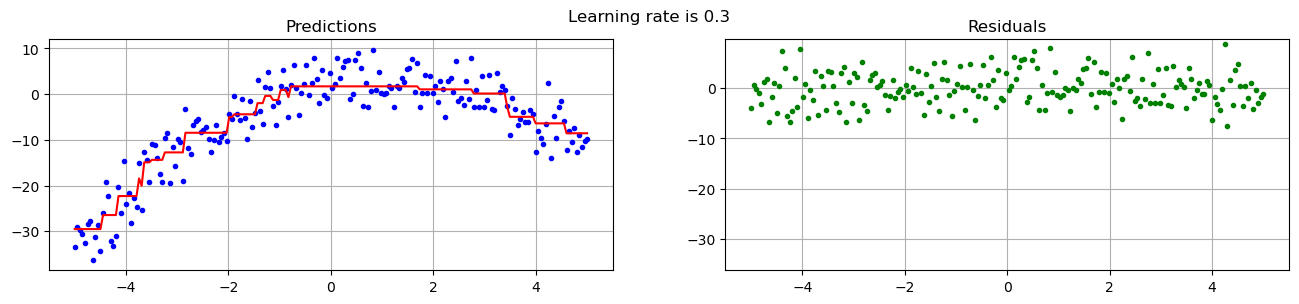

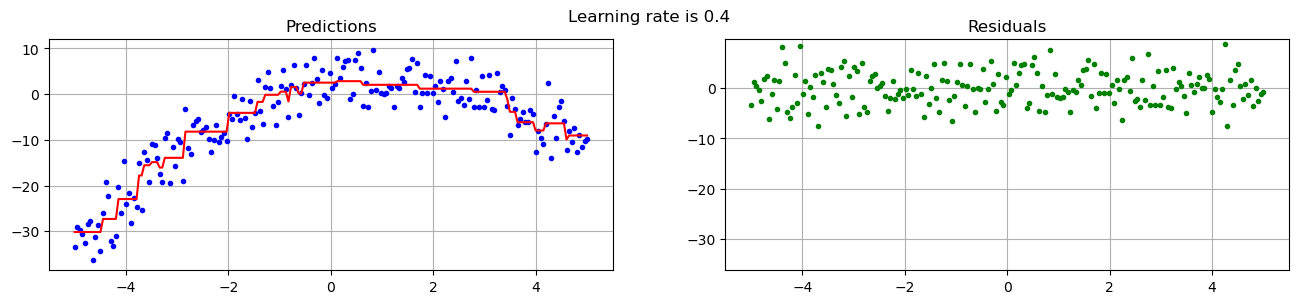

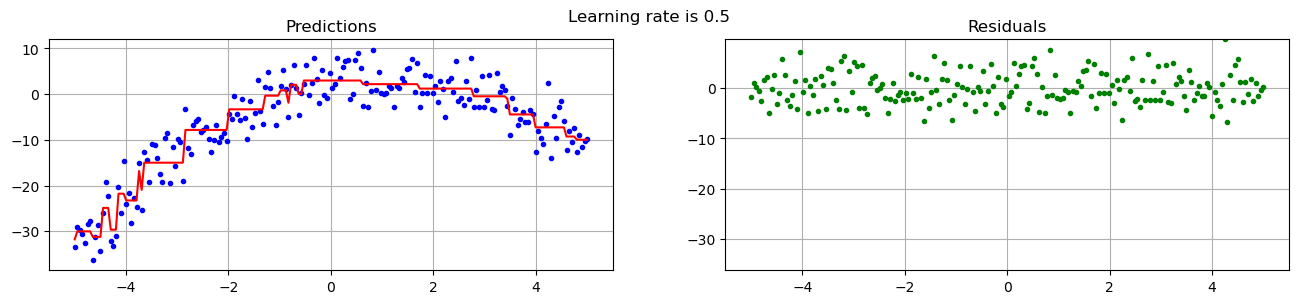

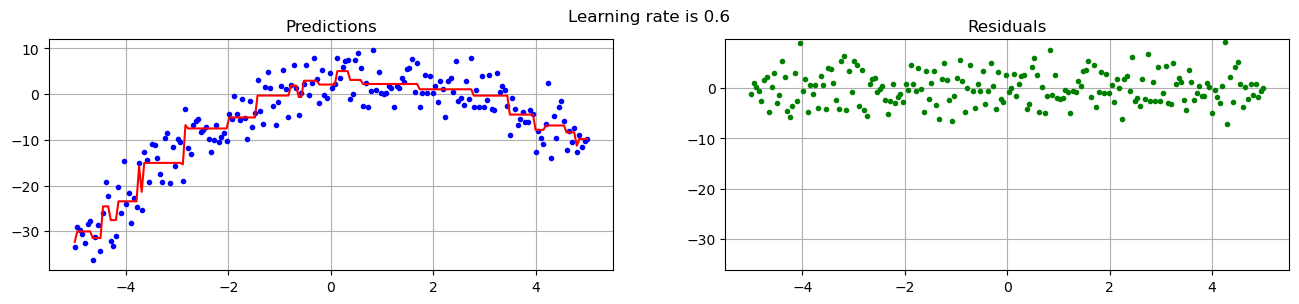

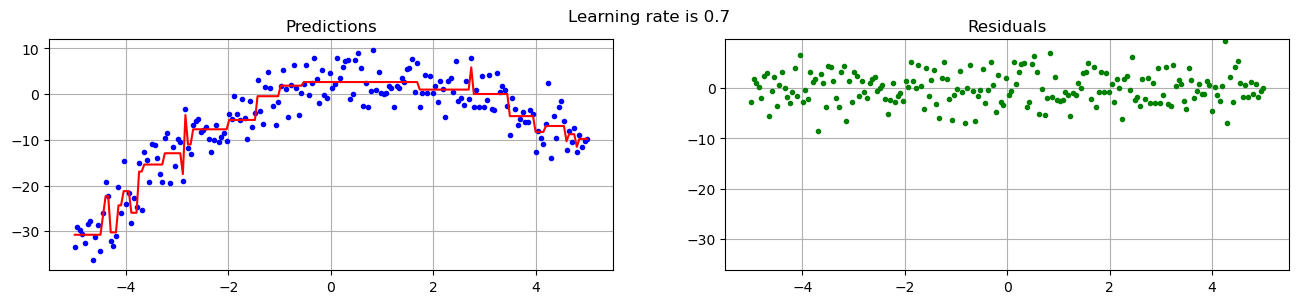

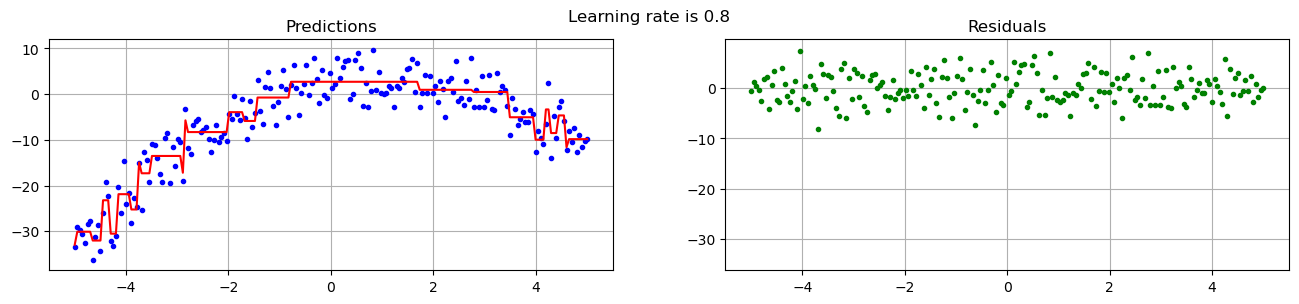

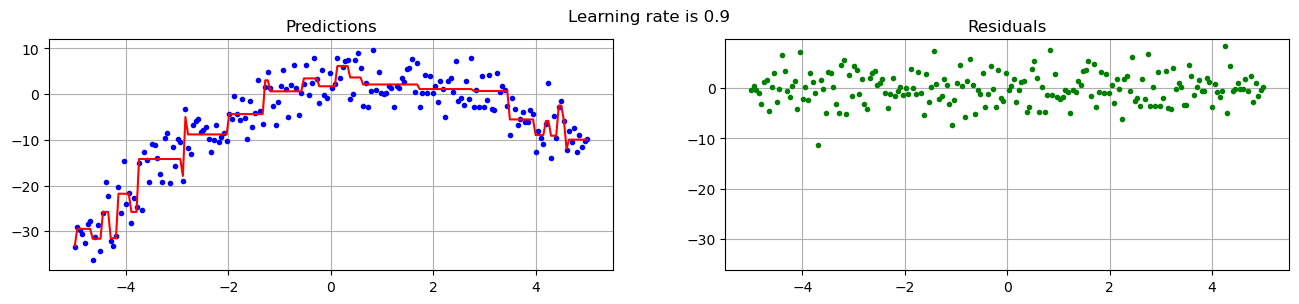

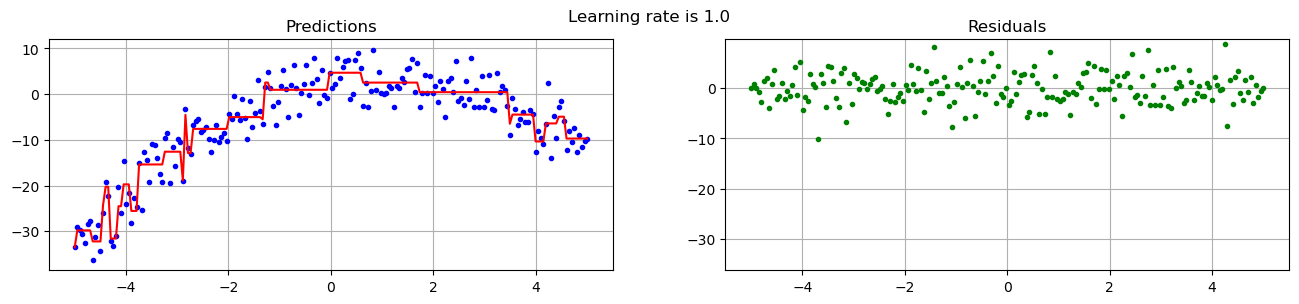

In [13]:
learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for eta in learning_rates:
    F0 = y.mean()
    Fm = np.full(N, F0)
    
    for _ in range(10):
        rm = y - Fm

        tree = DecisionTreeRegressor(max_depth=2).fit(x, rm)

        Fm += eta * tree.predict(x)
    plot_predictions_and_residuals(x, y, Fm, title=f'Learning rate is {eta}')